In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X = load_iris()['data'][:, [2,3]]
y = (load_iris()['target'] == 2).astype(int)

svm_lin = Pipeline([('scaler', StandardScaler()),
                    ('linsvc', LinearSVC(C = 1.0, loss = 'hinge'))])
svm_lin.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linsvc', LinearSVC(loss='hinge'))])

<function matplotlib.pyplot.show(close=None, block=None)>

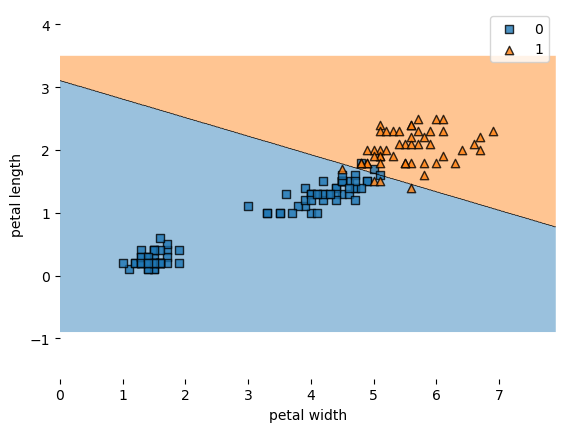

In [2]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X, y, clf = svm_lin, legend = 2)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.axis('equal')
plt.legend()
plt.show

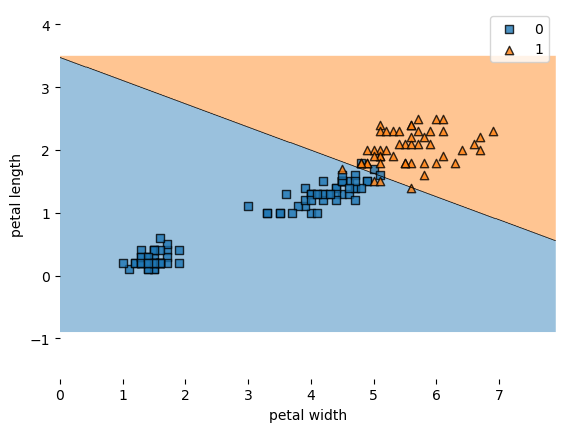

In [3]:
from sklearn.svm import SVC
svc = Pipeline([('scaler', StandardScaler()),
                ('svm', SVC(kernel = 'linear', C = 1.0))])
svc.fit(X, y)
plot_decision_regions(X, y, clf = svc, legend = 2)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.axis('equal')
plt.legend()
plt.show()

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples = 100, noise = .15)

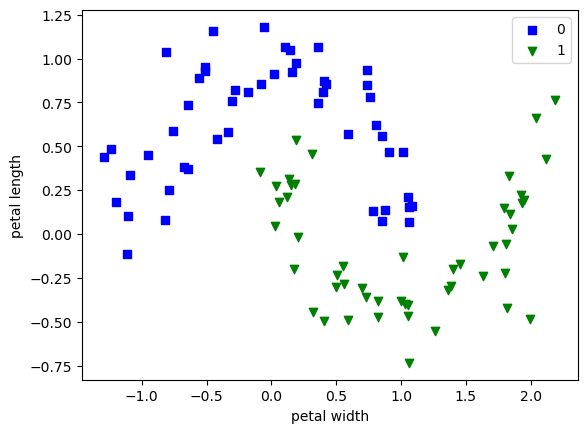

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0 , 1], color = 'blue', marker = 's', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1 , 1], color = 'green', marker = 'v', label = '1')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()
plt.show()

D:\ap\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


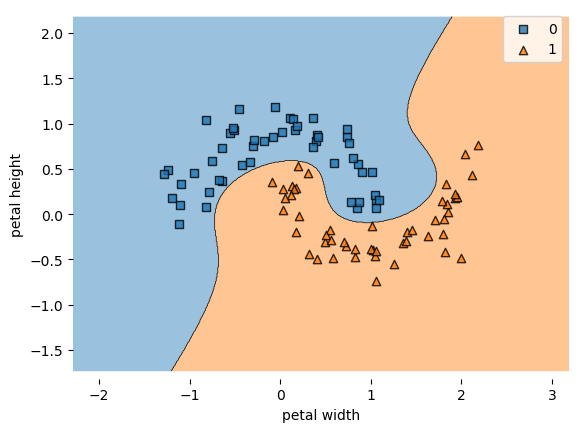

In [6]:
poly_pipe = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                      ('scaler', StandardScaler()),
                      ('svm', LinearSVC(C = 10.00, loss = 'hinge'))])
poly_pipe.fit(X, y)
plot_decision_regions(X, y, clf = poly_pipe, legend = 2)
plt.xlabel('petal width')
plt.ylabel('petal height')
plt.axis('equal')
plt.legend()
plt.show()

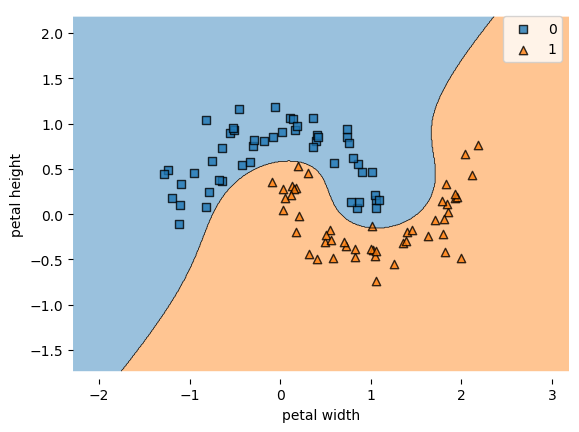

In [7]:
kernel_pipe = Pipeline([('scaler', StandardScaler()),
                        ('svm', SVC(kernel = 'poly', degree =3, coef0 = 1, C = 5))])
kernel_pipe.fit(X, y)
plot_decision_regions(X, y, clf = kernel_pipe, legend = 2)
plt.xlabel('petal width')
plt.ylabel('petal height')
plt.axis('equal')
plt.legend()
plt.show()

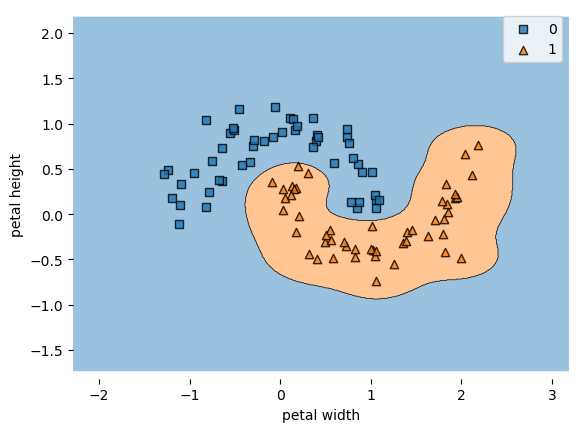

In [8]:
# using rbf with kernel trick
rbf_pipe = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(kernel = 'rbf', gamma = 5, C = 0.001))])
rbf_pipe.fit(X, y)
plot_decision_regions(X, y, clf = rbf_pipe, legend = 2)
plt.xlabel('petal width')
plt.ylabel('petal height')
plt.axis('equal')
plt.legend()
plt.show()

In [9]:
X = np.random.rand(100, 1) * 3 - 2
y = 1.2 * X+ 1 + np.random.standard_normal(100).reshape(-1, 1)
y = y.reshape(-1,)

In [10]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [11]:
# SVM Regression
from sklearn.svm import LinearSVR
lsvr = LinearSVR(epsilon = 1.5)
lsvr.fit(X, y)

LinearSVR(epsilon=1.5)

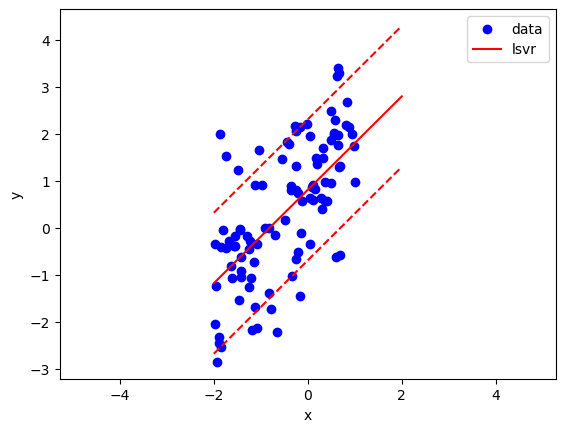

In [12]:
plt.scatter(X, y, color = 'blue', label = 'data', marker = 'o')
x_draw = np.linspace(-2, 2, 100).reshape(-1, 1)
y_draw_pred = lsvr.predict(x_draw)
plt.plot(x_draw, y_draw_pred, color = 'red', label = 'lsvr')
plt.plot(x_draw, y_draw_pred - 1.5, color = 'red', linestyle = 'dashed')
plt.plot(x_draw, y_draw_pred + 1.5, color = 'red', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.show()

In [13]:
#for non linear regression
X = (np.random.rand(100) * 3 - 2).reshape(-1, 1)
y = 1.2 * X ** 2 + 1.3 * X + 2 + np.random.standard_normal(100).reshape(-1,1)

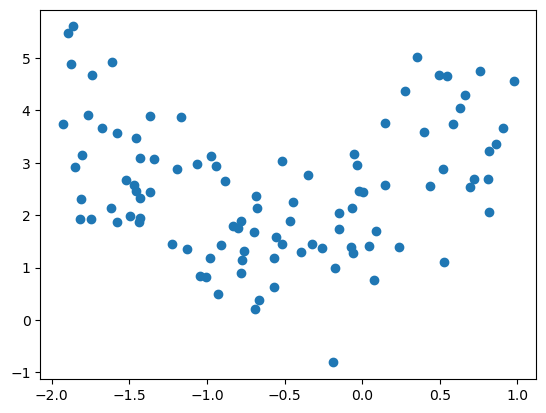

In [14]:
plt.scatter(X, y)
plt.show()

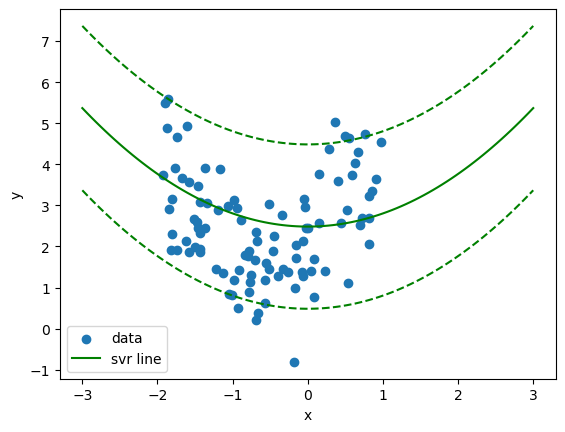

In [15]:
y = y.reshape(-1,)
# SVM regression for non linear relationship
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 100.0, epsilon = 2)
svm_poly_reg.fit(X, y)

plt.scatter(X, y, label = 'data')
x_draw = np.linspace(-3, 3, 100).reshape(100, 1)
y_draw_pred = svm_poly_reg.predict(x_draw)
plt.plot(x_draw, y_draw_pred, color = 'green', label = 'svr line')
plt.plot(x_draw, y_draw_pred - 2, color = 'green', linestyle = 'dashed')
plt.plot(x_draw, y_draw_pred + 2, color = 'green', linestyle = 'dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()